# Dynamic Bayesian Network
将已经分类好的点进行预测

In [2]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 从result中读取数据
origin_data = pd.read_csv(r'.\data\select_data.csv',index_col = False)        # 选取的部分数据
cluster_data = pd.read_csv(r'.\result\Cluster_result.csv',index_col = False)  # 选取的部分数据聚类后的分类簇
origin_data['start_coor'] = origin_data['start_coor'].apply(lambda x: eval(x))
origin_data['end_coor'] = origin_data['end_coor'].apply(lambda x: eval(x))


In [4]:
print(origin_data.shape[0]*2 == cluster_data.shape[0])
cluster_data.head(2)

True


,lon,lat,time,cluster
0,41.14521,-8.610633,2014-04-01 00:01:31,1
1,41.16978,-8.589258,2014-04-01 00:01:32,9


In [5]:
relation = pd.read_csv(r'.\result\relation.csv',index_col = False)
relation = relation.rename(columns={'origin_cluster':'cluster'})
relation.loc[len(relation)] = [-1,-1]
#cluster_data['cluster'] = pd.merge(cluster_data, relation, on = ['cluster'])['new_cluster'].values


In [7]:
origin_data['start_cluster'] = cluster_data['cluster'][0:len(origin_data)].values
origin_data['end_cluster'] = cluster_data['cluster'][len(origin_data):].values
#origin_data.to_csv(r'.\result\Cluster_result_month4_cleaned.csv',index = False)
origin_data.head()

,TRIP_ID,TAXI_ID,DAY_TYPE,CALL_TYPE,Polyline Length,Trip Time(sec),start_coor,end_coor,start_time,end_time,start_cluster,end_cluster
0,1396281691620000900,20000900,A,3,38,570,"[-8.610633, 41.14521]","[-8.585694, 41.148828]",2014-04-01 00:01:31,2014-04-01 00:11:01,1,1
1,1396281692620000353,20000353,A,2,56,840,"[-8.589258, 41.16978]","[-8.609571, 41.151834]",2014-04-01 00:01:32,2014-04-01 00:15:32,1,1
2,1396281713620000670,20000670,A,2,58,870,"[-8.61057, 41.145183]","[-8.614719, 41.152842]",2014-04-01 00:01:53,2014-04-01 00:16:23,1,1
3,1396281722620000467,20000467,A,3,38,570,"[-8.60004, 41.182713]","[-8.598843, 41.164596]",2014-04-01 00:02:02,2014-04-01 00:11:32,1,1
4,1396281727620000429,20000429,A,2,193,2895,"[-8.628516, 41.157414]","[-8.401986, 40.833675]",2014-04-01 00:02:07,2014-04-01 00:50:22,1,1


In [8]:
origin_data.shape

(4338, 12)

In [9]:
origin_data.head(5)

,TRIP_ID,TAXI_ID,DAY_TYPE,CALL_TYPE,Polyline Length,Trip Time(sec),start_coor,end_coor,start_time,end_time,start_cluster,end_cluster
0,1396281691620000900,20000900,A,3,38,570,"[-8.610633, 41.14521]","[-8.585694, 41.148828]",2014-04-01 00:01:31,2014-04-01 00:11:01,1,1
1,1396281692620000353,20000353,A,2,56,840,"[-8.589258, 41.16978]","[-8.609571, 41.151834]",2014-04-01 00:01:32,2014-04-01 00:15:32,1,1
2,1396281713620000670,20000670,A,2,58,870,"[-8.61057, 41.145183]","[-8.614719, 41.152842]",2014-04-01 00:01:53,2014-04-01 00:16:23,1,1
3,1396281722620000467,20000467,A,3,38,570,"[-8.60004, 41.182713]","[-8.598843, 41.164596]",2014-04-01 00:02:02,2014-04-01 00:11:32,1,1
4,1396281727620000429,20000429,A,2,193,2895,"[-8.628516, 41.157414]","[-8.401986, 40.833675]",2014-04-01 00:02:07,2014-04-01 00:50:22,1,1


In [10]:
origin_data.drop(origin_data[((origin_data['start_cluster'] == -1) | (origin_data['end_cluster'] == -1))].index,inplace = True)
origin_data.shape

(2581, 12)

In [11]:
cluster_num = max(origin_data['start_cluster'].max(),origin_data['end_cluster'].max())
print(f'聚类簇数目：{cluster_num}')

聚类簇数目：4


In [12]:

origin_data['start_time'] = pd.to_datetime(origin_data['start_time'],format='%Y-%m-%d %H:%M:%S')
origin_data['end_time'] =  pd.to_datetime(origin_data['end_time'],format='%Y-%m-%d %H:%M:%S')

In [13]:
origin_data[origin_data['start_cluster' ]== 3]['start_time'].min()

NaT

In [14]:
# call_type day_type TIME_TYPE
origin_data['DAY_TYPE'] = origin_data['DAY_TYPE'].apply(lambda x: 1 if (x == 'A') else (2 if x == 'B' else 3))
origin_data['TIME_TYPE'] = origin_data['start_time'].apply(lambda x :x.hour+1)
origin_data.head()

,TRIP_ID,TAXI_ID,DAY_TYPE,CALL_TYPE,Polyline Length,Trip Time(sec),start_coor,end_coor,start_time,end_time,start_cluster,end_cluster,TIME_TYPE
0,1396281691620000900,20000900,1,3,38,570,"[-8.610633, 41.14521]","[-8.585694, 41.148828]",2014-04-01 00:01:31,2014-04-01 00:11:01,1,1,1
1,1396281692620000353,20000353,1,2,56,840,"[-8.589258, 41.16978]","[-8.609571, 41.151834]",2014-04-01 00:01:32,2014-04-01 00:15:32,1,1,1
2,1396281713620000670,20000670,1,2,58,870,"[-8.61057, 41.145183]","[-8.614719, 41.152842]",2014-04-01 00:01:53,2014-04-01 00:16:23,1,1,1
3,1396281722620000467,20000467,1,3,38,570,"[-8.60004, 41.182713]","[-8.598843, 41.164596]",2014-04-01 00:02:02,2014-04-01 00:11:32,1,1,1
4,1396281727620000429,20000429,1,2,193,2895,"[-8.628516, 41.157414]","[-8.401986, 40.833675]",2014-04-01 00:02:07,2014-04-01 00:50:22,1,1,1


In [15]:
origin_data.to_csv(r'.\result\origin_data.csv',index = False)

## Set Up Model

In [16]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
data = origin_data.loc[:,['end_cluster','start_cluster','DAY_TYPE','CALL_TYPE','TIME_TYPE']]

In [17]:
# set up Model

BN = BayesianNetwork([('start_cluster','end_cluster'),
                      ('DAY_TYPE','end_cluster'),
                      ('TIME_TYPE','end_cluster'),
                     ('CALL_TYPE','end_cluster')])



In [21]:
# estimate CPDS
estimator = BayesianEstimator(BN, data)

# pseudo_counts为先验信息虚拟count ， 见 estimator.estimate_cpd 的 sample


cpd = estimator.estimate_cpd(node='end_cluster')

print(cpd)
data[(data['CALL_TYPE'] == 3) & (data['TIME_TYPE'] == 24) & (data['start_cluster'] == 2)]

+----------------+----------------------+-----+----------------------+------------------------+
| CALL_TYPE      | CALL_TYPE(1)         | ... | CALL_TYPE(3)         | CALL_TYPE(3)           |
+----------------+----------------------+-----+----------------------+------------------------+
| DAY_TYPE       | DAY_TYPE(1)          | ... | DAY_TYPE(1)          | DAY_TYPE(1)            |
+----------------+----------------------+-----+----------------------+------------------------+
| TIME_TYPE      | TIME_TYPE(1)         | ... | TIME_TYPE(23)        | TIME_TYPE(24)          |
+----------------+----------------------+-----+----------------------+------------------------+
| start_cluster  | start_cluster(1)     | ... | start_cluster(1)     | start_cluster(1)       |
+----------------+----------------------+-----+----------------------+------------------------+
| end_cluster(1) | 0.9979597388465722   | ... | 0.3198209718670077   | 0.2890962368908081     |
+----------------+----------------------

,end_cluster,start_cluster,DAY_TYPE,CALL_TYPE,TIME_TYPE


(4, 3, 1, 13, 1)
(4, 3, 13)


Text(33.0, 0.5, 'End_Cluster')

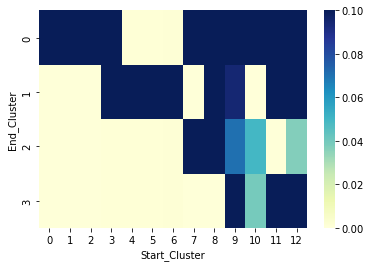

In [22]:
# ['end_cluster', 'CALL_TYPE', 'DAY_TYPE', 'TIME_TYPE', 'start_cluster']
print(cpd.values.shape)
# ['end_cluster', 'CALL_TYPE' , 'TIME_TYPE', 'start_cluster']
CPD = np.squeeze(cpd.values)
print(CPD.shape)
# print(cpd.no_to_name)

# 计算不同start_cluster每个时间段的转移
def Relative_Probability(CPD,rela_mat = [0,3]):
    rela_mat.sort()
    if len(CPD.shape) < 2:
        print(f'输入CPD矩阵维度{CPD.shape}，不等于2！')
        return
    if len(rela_mat) != 2:
        print(f'相对概率的输入索引mat应为[x,y]，为两列')
        return
    allindex = [i for i in range(len(CPD.shape))]
    num = [i for i in allindex if i not in rela_mat]

    t = 1
    for i in range(len(num)):
        t *= CPD.shape[num[i]]

    CPD = np.array(CPD)
    mat = np.zeros((CPD.shape[rela_mat[0]],CPD.shape[rela_mat[1]]))
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            temp = CPD.take(indices=i,axis=rela_mat[0])
            temp = temp.take(indices=j,axis=rela_mat[1]-1)
            mat[i,j] = temp.reshape(1,-1).sum()/t
            
    return np.array(mat)
RP = Relative_Probability(CPD,rela_mat = [0,2])
sns.heatmap(RP,vmin=0,             #刻度阈值
                 vmax=0.1,cmap="YlGnBu")

plt.xlabel("Start_Cluster",size=10)
plt.ylabel("End_Cluster",size=10)

## Model Testing

In [34]:
from pgmpy.inference import VariableElimination
# 关系score
from pgmpy.metrics import correlation_score 
# 结构score
from pgmpy.metrics import structure_score

In [35]:
correlation_score(BN, data, test="chi_square", significance_level=0.05)

0.6

In [36]:
structure_score(BN,data,scoring_method="bic")

-240666.2530243111

In [21]:
data

,A,C,D
0,1,1,1
1,1,0,0
2,1,1,0
3,0,0,1
4,1,0,0
...,...,...,...
995,1,0,1
996,1,1,0
997,0,0,1
998,0,1,1


In [23]:
## input latent variable
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ExpectationMaximization as EM
model = BayesianNetwork([('start_cluster','end_cluster'),
                      ('DAY_TYPE','DateTime'),
                      ('CALL_TYPE','end_cluster'),
                     ('TIME_TYPE','DateTime'),
                     ('DateTime','end_cluster')],
                    latents = {'DateTime'})
estimator = EM(model, data)


In [24]:
CPDs = estimator.get_parameters(latent_card = {'DateTime':12})



  0%|          | 0/100 [00:00<?, ?it/s]

In [27]:
for i in range(len(CPDs)):    
    model.add_cpds(CPDs[i])
data['DateTime'] = model.predict(data)
correlation_score(model, data, test="chi_square", significance_level=0.05)

  0%|          | 0/723 [00:00<?, ?it/s]

0.5333333333333333

In [29]:
structure_score(model,data,scoring_method="bic")

-125101.59211800048

()